# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #30 Text Files in Python

In [1]:
%run video-00.py

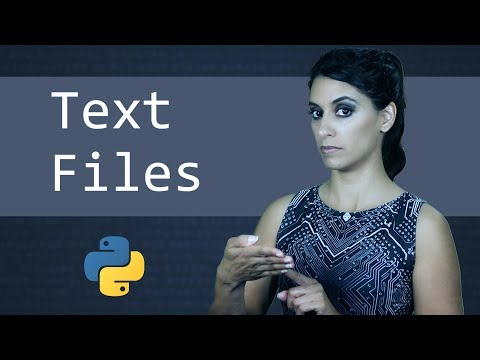

In [2]:
from IPython import display

video = display.YouTubeVideo('4mX0uPQFLDU')
video
display.HTML(f'<a href="{video.src}">link</a>')

From [Wikipedia](https://en.wikipedia.org/wiki/Computer_file):

>A computer file is a computer resource for recording data discretely in a computer storage device. Just as words can be written to paper, so can information be written to a computer file.

[Previously](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-20.ipynb) we were introduced to Python’s `open()` function, using it with our study of CSV files.

We printed the contents to [standard output](https://docs.python.org/3/library/subprocess.html?highlight=stdout#subprocess.TimeoutExpired.stdout) like this:

In [3]:
file = open('./video-20-returns.csv')
lines = file.readlines()
for line in lines[:10]: # slice off the first 10 lines
    print(line)

file.close()

Date,Return

08/19/2014,0.00807338679366512

08/18/2014,0.01513558145700471

08/15/2014,-0.002035936210237145

08/14/2014,-0.00022616377949099596

08/13/2014,0.02141339565845119

08/12/2014,-0.009068757247306238

08/11/2014,-0.0015647976973009433

08/08/2014,0.009603123672452266

08/07/2014,-0.005321660638059957



We see that the `.readlines()` method of the [text](https://docs.python.org/3/library/io.html#text-i-o) implementation of the [file object](https://docs.python.org/3/glossary.html#term-file-object) is being used to return a `list` of lines:

In [4]:
help(file.readlines)

Help on built-in function readlines:

readlines(hint=-1, /) method of _io.TextIOWrapper instance
    Return a list of lines from the stream.
    
    hint can be specified to control the number of lines read: no more
    lines will be read if the total size (in bytes/characters) of all
    lines so far exceeds hint.



Alternatively, the `.read()` method can read the entire file which can be memory intensive:

In [5]:
help(file.read)

Help on built-in function read:

read(size=-1, /) method of _io.TextIOWrapper instance
    Read at most n characters from stream.
    
    Read from underlying buffer until we have n characters or we hit EOF.
    If n is negative or omitted, read until EOF.



The `size` argument of `.read()` can limit the amount of the file read by _n_ characters:

In [6]:
file = open('./video-20-returns.csv')
text = file.read(32)
file.close()

text
len(text)

'Date,Return\n08/19/2014,0.0080733'

32

Calling `file.close()` is [a highly recommended practice](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files):

>…you should call `f.close()` to close the file and immediately free up any system resources used by it. If you don’t explicitly close a file, Python’s garbage collector will eventually destroy the object and close the open file for you, but the file may stay open for a while. Another risk is that different Python implementations will do this clean-up at different times.

It is possible that [an exception](https://docs.python.org/3/library/exceptions.html) can be thrown _before_ `f.close()` is called. This could tax resources of the system hosting Python. Here are two ways to address this problem:

In [7]:
try:
    file = open('./video-20-returns.csv')
    text = file.read(32)
finally:
    file.close()

text
file.closed

'Date,Return\n08/19/2014,0.0080733'

True

The `try`-`finally` block (i) [📖 [docs](https://docs.python.org/3/reference/compound_stmts.html#the-try-statement)] guarantees that the file will be closed. The shorthand equivalent of the `try`-`finally` block is (ii) the `with`-`as` block [📖 [docs](https://docs.python.org/3/reference/compound_stmts.html#with)]:

In [8]:
with open('./video-20-returns.csv') as file:
    text = file.read(32)

text
file.closed

'Date,Return\n08/19/2014,0.0080733'

True

### Writing Lines to a File

We also saw [in a previous video](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-20.ipynb) how the `csv.writer` was used to write to a file. The `.write()` method of the text implementation of the file object writes for any text file:

In [9]:
oceans = ['Pacific', 'Atlantic', 'Indian', 'Southern', 'Artic']

with open('./video-30.txt', 'w') as f:
    for ocean in oceans:
        print(ocean, file=f)

In [10]:
%cat ./video-30.txt

Pacific
Atlantic
Indian
Southern
Artic


To ensure that line breaks were written to the file, we used the `file` argument of `print()` [📖 [docs](https://docs.python.org/3/library/functions.html#print)].